# Phasenrückschlag

Auf dieser Seite behandeln wir ein Verhalten von kontrollierten Quantengattern, das als „Phasen-Kickback“ bekannt ist. Dieser interessante Quanteneffekt ist ein Baustein in vielen berühmten Quantenalgorithmen, darunter Shors Faktorisierungsalgorithmus und Grovers Suchalgorithmus.

## Eigenvektoren

Sie sollten bereits mit Eigenvektoren und Eigenwerten vertraut sein, aber wenn nicht, können Sie [hier](https://www.khanacademy.org/math/linear-algebra/alternate-bases/eigen-everything/v/linear-algebra-introduction-to-eigenvalues-and-eigenvectors) eine schöne Einführung lesen. Wenn Sie vertraut *sind* , sollten Sie die Eigenvektorgleichung erkennen:

$$ \class{_matrix-A}{A}\class{_eig-vec-A}{|x\rangle} = \class{_eig-val-A}{\lambda}\class{_eig-vec-A} {|x\rangle} $$

Beim Quantencomputing ist das noch einfacher. Da alle unsere Zustandsvektoren den Betrag 1 haben, müssen auch unsere Eigenwerte den Betrag 1 haben, also $\lambda = e^{2\pi i \theta}$. Für ein Quantengatter $U$ und seinen Eigenzustand $|x\rangle$ gilt also:

$$ \class{_matrix-U}{U}\class{_eig-vec-U}{|x\rangle} = \class{_eig-val-U}{e^{2\pi i \theta}}\ class{_eig-vec-U}{|x\rangle} $$

Zusammenfassend: Wenn ein Gatter alle Amplituden eines Zustandsvektors um denselben Betrag dreht (und nur dreht), dann ist dieser Zustand ein *Eigenzustand* dieses Gatters.

<!-- ::: q-block -->

### Erkundung von Eigenvektoren

Verwenden Sie das Widget unten, um zu sehen, wie ein Single-Qubit-Gate einen Single-Qubit-Zustand umwandelt. Können Sie herausfinden, welche Zustände Eigenzustände welcher Gatter sind?

```
q-eigenvector-widget
```

<!-- ::: -->

## Kontrollierte Gates &amp; Eigenzustände

Sobald Sie sich mit dem Konzept der Eigenzustände vertraut gemacht haben, können wir darüber nachdenken, was passiert, wenn wir diese Schaltkreise anhand des Zustands eines anderen Qubits steuern. Wir wissen zum Beispiel, dass das Z-Gatter, das auf den Zustand $|1\rangle$ einwirkt, eine negative globale Phase einführt ($\theta = 0,5$), lassen Sie uns herausfinden, was passiert, wenn wir diese Operation steuern.

<!-- ::: q-block.tabs -->

### Das kontrollierte Z-Tor

<!-- ::: tab -->

### |10〉

<!-- ::: column(width=200) -->

Wenn das Kontroll-Qubit $|0\rangle$ ist, dann ist das Verhalten trivial; nichts passiert.

<!-- ::: column(width=400) -->

![Schaltplan, der ein Zwei-Qubit-Register im Zustand 01 zeigt, auf das ein CZ-Gate wirkt. Der Zustand ist unverändert](images/kickback/tabs/0/0.svg)

<!-- ::: -->

<!-- ::: tab -->

### |11〉

<!-- ::: column(width=200) -->

Wenn das Kontroll-Qubit $|1\rangle$ ist, führt das Gate eine globale Phase ein (beachten Sie das Minuszeichen im Bild rechts), aber die Zustände des Qubits bleiben unverändert.

<!-- ::: column(width=400) -->

![Schaltplan, der ein Zwei-Qubit-Register im Zustand 01 zeigt, auf das ein CZ-Gate wirkt. Der Zustand ist unverändert](images/kickback/tabs/0/1.svg)

<!-- ::: -->

<!-- ::: tab -->

### |1+〉

<!-- ::: column(width=200) -->

Das kontrollierte Z-Gate tut nichts, wenn die Steuerung $|0\rangle$ ist, und führt eine negative Phase ein, wenn die Steuerung $|1\rangle$ ist. Wenn sich das Steuer-Qubit in Überlagerung befindet, ändert das Gate die *relative* Phase zwischen den Zuständen $|0\rangle$ und $|1\rangle$ des Steuer-Qubits.

<!-- ::: column(width=400) -->

![Schaltplan, der ein Zwei-Qubit-Register im Zustand 01 zeigt, auf das ein CZ-Gate wirkt. Der Zustand ist unverändert](images/kickback/tabs/0/2.svg)

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

Wenn das Steuerelement $|{+}\rangle$ und das Ziel $|1\rangle$ ist, ändert das kontrollierte Z-Gate den Zustand des *Steuer-* Qubits, lässt das Ziel-Qubit jedoch unverändert. Dieser Effekt wird „Phase Kickback“ genannt, da der Eigenwert in den Zustand des Kontroll-Qubits zurückkehrt.

Allgemeiner gesagt: Wenn wir ein Quantengatter $U$ und seinen Eigenzustand $|x\rangle$ haben, dann fügt $U$, das auf $|x\rangle$ einwirkt, eine globale Phase $\theta$ hinzu, wie wir oben gesehen haben.

$$ \class{_matrix-U}{U}\class{_eig-vec-U}{|x\rangle} = \class{_eig-val-U}{e^{2\pi i \theta}}\ class{_eig-vec-U}{|x\rangle} $$

Wenn wir die Operation $U|x\rangle$ durch ein anderes Qubit in einer Überlagerung von $|0\rangle$ und $|1\rangle$ steuern, dann hat dies den Effekt, dass das Steuer-Qubit um die Z-Achse rotiert Winkel $\theta$. Dh:

$$ \class{_matrix-CU}{CU}\class{_eig-vec-U}{|x\rangle}\class{_control-qubit-pre}{(\alpha|0\rangle + \beta|1\ rangle)} = \class{_eig-vec-U}{|x\rangle}\class{_control-qubit-post}{(\alpha|0\rangle + \beta e^{2\pi i \theta}| 1\rangle)} $$

Im obigen Beispiel sehen wir, dass die „Steuerung“ des gesteuerten Z-Gatters tatsächlich eine Z-Rotation durchführt; etwas, das das Qubit nur hätte beobachten sollen, hat es tatsächlich verändert. Aus diesem Grund sehen Sie das kontrollierte Z-Gate oft als zwei Kontrollen gezeichnet.

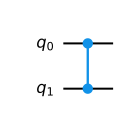

In [1]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.cz(0,1)
qc.draw()

## Das CNOT-Tor

Betrachten wir den Phase-Kickback-Effekt mit einem anderen Zwei-Qubit-Gate. Da der Zustand $|{-}\rangle$ ein Eigenzustand des X-Gatters mit dem Eigenwert $-1$ ist, erhalten wir:

$$ \class{_matrix-CX}{CX}\class{_eig-vec-X}{|{-}\rangle}\class{_control-qubit-pre}{(\alpha|0\rangle + \beta| 1\rangle)} = \class{_eig-vec-X}{|{-}\rangle}\class{_control-qubit-post}{(\alpha|0\rangle - \beta |1\rangle)} $ $

![](images/kickback/cnot-kickback.svg)

Auch in diesem Fall ist die Phasenänderung $\theta = 0,5$, also wird unser Kontroll-Qubit um die Z-Achse gedreht.

<!-- ::: q-block -->

### Gearbeitetes Beispiel

<summary>Kickback mit dem CNOT-Gate (zum Vergrößern klicken)</summary>

```
q-carousel
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-0.svg"><br>By definition, the controlled-X gate (CNOT) flips the state of the target qubit (in our example, the rightmost bit is the target) if the control qubit is $|1\rangle$. In the image above, we show the CNOT gate transforming one state vector to another.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-1.svg"><br>For example, if the control qubit is in the state $|0\rangle$, then we always get the exact same statevector back. In the image above, the amplitudes of the states where the control is $|1\rangle$ are both zero, so we see no effect when we swap them.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-2.svg"><br>Another example: If the control qubit is in the state $|1\rangle$, then we do an X-gate on the target qubit. In this case, the target qubit is in an eigenstate of the X-gate, so we get the same statevector back, up to global phase. This change is a global phase, since the relative phase between the $|0\rangle$ and $|1\rangle$ amplitudes of the target qubit stayed the same.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-3.svg"><br>Let us look at the state vector when the control is in the state $|{+}\rangle$ (i.e. $\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$), and the target in the state $|{-}\rangle$ (i.e. $\tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$). We can see these two qubits are separable, as measuring one does not affect the state of the other.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-4.svg"><br> For example, regardless of whether we measure the control qubit as $|0\rangle$ or $|1\rangle$, the amplitudes for measuring the target as $|0\rangle$ or $|1\rangle$ stay the same.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-5.svg"><br>With all this in mind, let's see what happens when we apply the CNOT to this $|{+}{-}\rangle$ state.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-6.svg"><br>After the CNOT, these qubits are still separable, as the state of one does not change when we measure the other. However, the relative phase between the $|0\rangle$ and $|1\rangle$ amplitudes of the control qubit has changed!
```




<!-- ::: -->

Wenn wir uns daran erinnern, dass das H-Gatter die Transformation $|0\rangle \rightarrow |{+}\rangle$ und $|1\rangle \rightarrow |{-}\rangle$ durchführt (und umgekehrt), erhalten wir Folgendes Identität:

![](images/kickback/cnot-identity.svg)

## Deutschs Problem

Wir haben gerade gesehen, dass die Konditionierung einer Aktion auf den Zustand eines Qubits tatsächlich den Zustand des steuernden Qubits ändern kann. Dies ist ein „Quanten“-Effekt, dh etwas, das wir bei klassischen Bits nicht sehen.

Beim Quantencomputing wollen wir Algorithmen entwickeln, die klassische Computer *nicht* ausführen können, also ist ein guter Anfang, zu versuchen, diesen Effekt als ein zu lösendes Problem neu zu formulieren. Auf diese Weise können wir beweisen, dass Quantencomputer in irgendetwas zumindest etwas besser sind als klassische Computer.

Das Problem von Deutsch macht genau das. Deutsch ist ein „Black Box“-Problem; ein künstliches Problem, bei dem wir eine Funktion auf unsere Bits anwenden dürfen, uns aber nicht ansehen dürfen, wie die Funktion funktioniert. Die Herausforderung besteht darin, einige Eigenschaften der Box zu entdecken, indem verschiedene Ein- und Ausgänge ausprobiert werden.

Deutschs Problem ist folgendes: Wir haben eine klassische, umkehrbare Funktion (die wir kurz $f$ nennen), die auf zwei Bits wirkt, $ a $ &amp; $ b $. Die Funktion lässt Bit $ a $ in Ruhe, kann aber Bit $ b $ umkehren oder nicht. Deutschs Problem verlangt von uns, herauszufinden, ob sich $f$ in Abhängigkeit vom Wert von $ a $ anders verhält (wir nennen das "ausgeglichenes" Verhalten) oder ob es $ a $ ignoriert und immer dasselbe mit $ b $ macht ("konstantes" Verhalten). Die Herausforderung besteht darin, dies zu tun, während Sie $f$ so wenig wie möglich anwenden.

![Bild von deutschs Problem als Quantenschaltkreis. Die Schaltung hat zwei Bits, die oberen und unteren Drähte sind jeweils mit ](images/kickback/deutsch-problem.svg)

Der beste klassische Algorithmus für dieses Problem wendet $f$ zweimal mit unterschiedlichen Werten von $ a $ an und prüft dann, ob sich $f$ anders verhalten hat.

## Deutschs Algorithmus

Wie Sie vielleicht schon erraten haben, können wir Phasen-Kickback verwenden, um einen Quantenalgorithmus zu erstellen, der sogar noch besser abschneidet als der klassische Algorithmus. Wenn wir Qubit $ a $ in den Zustand $|{+}\rangle$ und Qubit $ b $ in den Zustand $|{-}\rangle$ versetzen, dann wird jeder Flip, der auf $ a $ bedingt ist, einen negativen Relativwert zurückwerfen Phase, wobei Qubit $ a $ von $|{+}\rangle$ zu $|{-}\rangle$ umgedreht wird. Wir können dann ein H-Gatter auf $ a $ anwenden, um zu sehen, ob ein Kickback aufgetreten ist oder nicht.

![Bild von Deutschs Algorithmus als Quantenschaltkreis.](images/kickback/deutsch-algorithm.svg)

<!-- ::: q-block.reminder -->

### Mehr Info


<summary>In der Blackbox (zum Vergrößern klicken)</summary> Wenn dies immer noch wie Zauberei erscheint, kann es helfen, über alle möglichen Deutsch-Funktionen und die Quantenschaltkreise nachzudenken, die sie implementieren. Es gibt vier mögliche Deutsch-Funktionen: zwei konstante und zwei ausgeglichene.

Wenn sie konstant ist, kann die Funktion entweder nichts tun oder Qubit $ b $ umdrehen. Im ausgeglichenen Zustand kann die Funktion entweder $ b $ nur umkehren, wenn $ a $ $|1\rangle$ ist, oder $ b $ nur umkehren, wenn $ a $ $|0\rangle$ ist. Sie können alle vier Szenarien im Bild unten sehen.

<img src="images/kickback/deutsch-oracles.svg">

Bei beiden konstanten Funktionen bleibt das oberste Qubit unverändert (da wir nichts daran tun), und bei den ausgeglichenen Funktionen dreht der Kickback-Effekt das oberste Qubit von $|{+}\rangle$ auf $|{- }\rangle$.




<!-- ::: -->

Dies ist nicht das beeindruckendste Beispiel für Quantenbeschleunigung; es ist sehr spezifisch und wir finden keine Black-Box-Probleme in freier Wildbahn. Stattdessen liefert uns Deutschs Problem ein ermutigendes Ergebnis und einige interessante Effekte, die es zu untersuchen gilt. Im Rest dieses Kurses werden wir dieses einfache Experiment erweitern, um noch beeindruckendere Probleme zu lösen, einschließlich Factoring.

<!-- ::: q-block.exercise -->

### Übung

Erstellen Sie eine Funktion, `deutsch()` , die eine Deutsch-Funktion als `QuantumCircuit` verwendet und den Deutsch-Algorithmus verwendet, um sie auf einem Quantensimulator zu lösen. Ihre Funktion sollte `True` zurückgeben, wenn die Deutsch-Funktion ausgeglichen ist, und `False` , wenn sie konstant ist.

Sie können die Funktion `deutsch_problem()` verwenden, um einen `QuantumCircuit` zu erstellen, den Sie als Eingabe für Ihre `deutsch()` Funktion verwenden können.

<!-- ::: -->

In [ ]:
from qiskit import QuantumCircuit
import numpy as np

def deutsch_problem(seed=None):
    """Returns a circuit that carries out the function
    from Deutsch's problem.
    Args:
        seed (int): If set, then returned circuit will
            always be the same for the same seed.
    Returns: QuantumCircuit
    """
    np.random.seed(seed)
    problem = QuantumCircuit(2)
    if np.random.randint(2):
        print("Function is balanced.")
        problem.cx(0, 1)
    else:
        print("Function is constant.")
    if np.random.randint(2):
        problem.x(1)
    return problem

In [ ]:
def deutsch(function):
    """Implements Deutsch's algorithm.

    Args:
        function (QuantumCircuit): Deutsch function to solve.
            Must be a 2-qubit circuit, and either balanced,
            or constant.
    Returns:
        bool: True if the circuit is balanced, otherwise False.
    """

    # your code here

## Zusammenfassung

Auf dieser Seite haben wir:

- fasste das Konzept der Eigenwerte und Eigenvektoren zusammen
- untersuchte den Phasen-Kickback-Effekt und behandelte einige spezifische Beispiele
- führte Deutschs Problem als ein Szenario ein, in dem Quantencomputer gegenüber klassischen Computern im Vorteil sind

Wenn Sie alles andere auf dieser Seite vergessen haben, ist die folgende Zusammenfassung des Phasenrückschlags das Wichtigste, an das Sie sich erinnern und mit dem Sie sich wohl fühlen sollten:

<!-- ::: q-block.reminder -->

### Erinnerung: Phasenrückschlag

Wenn wir ein Quantengatter $U$ und seinen Eigenzustand $|x\rangle$ haben, dann fügt $U$, das auf $|x\rangle$ einwirkt, eine globale Phase $\theta$ hinzu. Dh:

$$ \class{_matrix-U}{U}\class{_eig-vec-U}{|x\rangle} = \class{_eig-val-U}{e^{2\pi i \theta}}\ class{_eig-vec-U}{|x\rangle} $$

Wenn wir die Operation $U|x\rangle$ durch ein anderes Qubit in einer Überlagerung von $|0\rangle$ und $|1\rangle$ steuern, dann hat dies den Effekt, dass das Steuer-Qubit um die Z-Achse rotiert Winkel $\theta$. Dh:

$$ \class{_matrix-CU}{CU}\class{_eig-vec-U}{|x\rangle}\class{_control-qubit-pre}{(\alpha|0\rangle + \beta|1\ rangle)} = \class{_eig-vec-U}{|x\rangle}\class{_control-qubit-post}{(\alpha|0\rangle + \beta e^{2\pi i \theta}| 1\rangle)} $$

<!-- ::: -->